In [31]:
!pip3 install fuzzy-c-means
from fcmeans import FCM
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
from seaborn import scatterplot as scatter
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
path = '/content/drive/My Drive/btp-data/musicDataAllSubjects.csv'
raw_df = pd.read_csv(path)
raw_df = raw_df['fp1']
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(10)

0    191.313644
1    196.947540
2    203.501801
3    210.446854
4    217.094513
5    222.857788
6    227.468414
7    231.066528
8    234.143402
9    237.364487
Name: fp1, dtype: float64

In [49]:
ekg_data_segment = raw_df
segment_len = 20
slide_len = 20

segments = []
for start_pos in range(0, len(ekg_data_segment), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    segment = np.copy(ekg_data_segment[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(segment) != segment_len:
        continue
    segments.append(segment)

print("Produced %d waveform segments" % len(segments))

Produced 84011 waveform segments


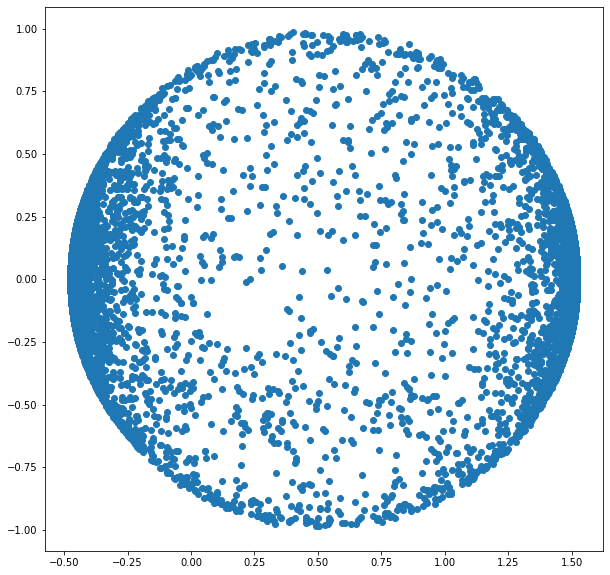

In [60]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(segments) 

# Normalizing the Data 
# scaler= MinMaxScaler()
# scaler.fit(scaled_df) 
# normalized_df=scaler.transform(scaled_df)
normalized_df = normalize(scaled_df) 
  



# # Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)
plt.figure(figsize =(10,10)) 
plt.scatter(X_principal['P1'], X_principal['P2'])
  

In [0]:

# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(X_principal)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

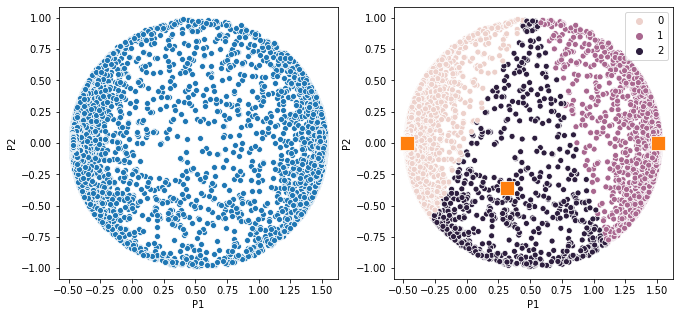

In [58]:
# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X_principal['P1'], X_principal['P2'], ax=axes[0])
scatter(X_principal['P1'], X_principal['P2'], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers['P1'], fcm_centers['P2'], ax=axes[1],marker="s",s=200)
plt.show()